In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# 读取两张图像
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')

In [3]:
# 转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 初始化SIFT检测器
sift = cv2.SIFT_create()

# 找到关键点和描述符
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# 初始化匹配器（使用暴力匹配算法）
matcher = cv2.BFMatcher()

# 匹配描述符
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# 根据Lowe's ratio test筛选好的匹配点
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 提取匹配点的坐标
pts_src = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pts_dst = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 使用RANSAC算法计算单应性矩阵
H, _ = cv2.findHomography(pts_src, pts_dst, cv2.RANSAC, 5.0)

print("单应性矩阵:\n", H)


单应性矩阵:
 [[ 1.59307623e+00 -2.77339565e-01 -3.59252527e+02]
 [ 6.57244521e-01  1.41141227e+00 -2.22262930e+02]
 [ 1.34592032e-03 -1.24973064e-04  1.00000000e+00]]


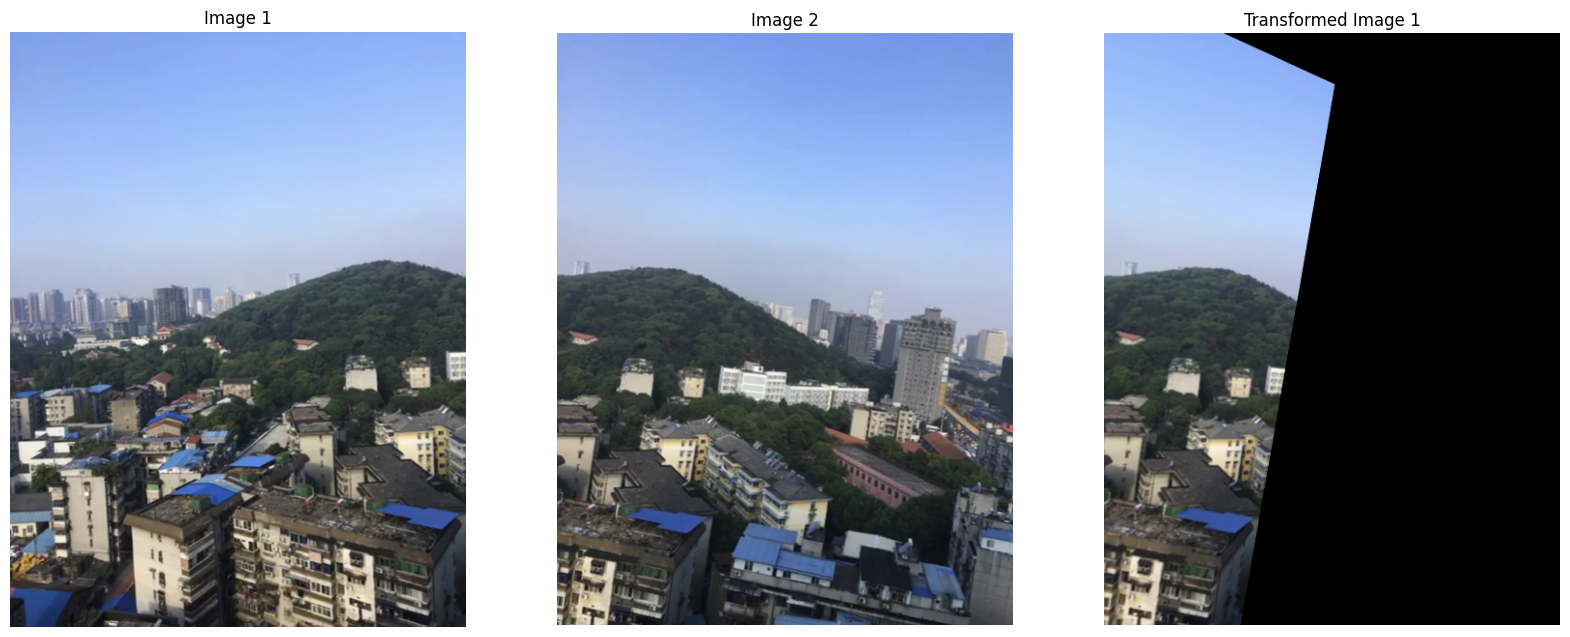

In [4]:
# 应用单应性变换
height, width, channels = img2.shape
img1_transformed = cv2.warpPerspective(img1, H, (width, height))

# 显示结果
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title('Image 1')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Image 2')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Transformed Image 1')
plt.imshow(cv2.cvtColor(img1_transformed, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()